In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.tokenize import RegexpTokenizer
import collections
import seaborn as sns

In [10]:
data = pd.read_csv('results.csv')

In [ ]:
#limpa o texto e gera tokens
words = ''.join(str(v) for v in data.texto).lower()
tokens = RegexpTokenizer(r'[A-zÀ-ú\d]+').tokenize(texts)

## Questão 1:

In [35]:
docs_count = data.texto.count()
words_count = collections.Counter(tokens)
word_occurrences = sum(words_count.values())
voc_size = len(words_count.keys())
#numero de palavras com mais de 1000 ocorrencias
n_most_frequent = 0
n_less_frequent = 0
for word in words_count:
    if words_count[word] > 1000:
        n_most_frequent += 1
    if words_count[word] == 1:
        n_less_frequent += 1

In [36]:
table41 = pd.DataFrame(
    data={'names':['Total Documents', 'Total word ocurrences', 'Vocabulary size', 'Words occurring > 1000 times', 'Words occurring once'], 
          'values':[ docs_count, word_occurrences, voc_size, n_most_frequent, n_less_frequent]
         })
table41

,names,values
0,Total Documents,201
1,Total word ocurrences,170360
2,Vocabulary size,20806
3,Words occurring > 1000 times,21
4,Words occurring once,10555


## Questão 2:

In [44]:
rank = 1
ranks = []
words = []
freqs = []
probs = []
rprobs = []
for word,n in words_count.most_common():
    prob = (n/word_occurrences) * 100
    rprobs.append(rank * prob / 100)
    probs.append(prob)
    words.append(word)
    freqs.append(n)
    ranks.append(rank)
    rank += 1

table42 = pd.DataFrame()
table42['Word'] = words
table42['Freq'] = freqs
table42['r'] = ranks
table42['Pr(%)'] = probs
table42['r.Pr'] = rprobs
table42.head(50)

,Word,Freq,r,Pr(%),r.Pr
0,de,8000,1,4.695938,0.046959
1,a,5938,2,3.485560,0.069711
2,o,5158,3,3.027706,0.090831
3,que,5158,4,3.027706,0.121108
4,e,4597,5,2.698403,0.134920
5,do,2741,6,1.608946,0.096537
6,em,2693,7,1.580770,0.110654
7,da,2253,8,1.322494,0.105799
8,um,2071,9,1.215661,0.109409
9,para,1850,10,1.085936,0.108594


## Questão 3:

In [58]:
pr_prob = table42['Pr(%)'] / 100
c = np.median(table42['r.Pr'])
table42['c'] = c / pr_prob
message = "the best c parameter is %f" % c
message

'the best c parameter is 0.102498'

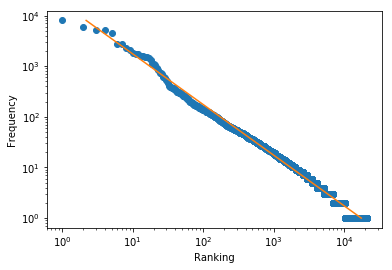

In [60]:
f, ax = plt.subplots()
ax.set(xscale="log", yscale="log")
plt.plot(table42['r'], table42['Freq'], linestyle='None', marker='o')
plt.plot(table42['bestc'], table42['Freq'], linestyle='-', marker='None')
plt.xlabel('Ranking')
plt.ylabel('Frequency')
plt.show()

## Questão 4:

In [69]:
occ = list(range(1,11))
predicted_prop = [round(1/(n*(n+1)), 3) for n in occ]
actual_prop = [round(len(table42[table42.Freq == n])/voc_size, 3) for n in n_occurrences]
words_number = [len(table42[table42.Freq == n]) for n in n_occurrences]

table45 = pd.DataFrame()
table45['Number of Occurrences (n)'] = occ
table45['Predicted proportion (1/n(n+1))'] = predicted_prop
table45['Actual Proportion'] = actual_prop
table45['Actual Number of Words'] = words_number
table45

,Number of Occurrences (n),Predicted proportion (1/n(n+1)),Actual Proportion,Actual Number of Words
0,1,0.500,0.507,10555
1,2,0.167,0.164,3419
2,3,0.083,0.079,1652
3,4,0.050,0.049,1012
4,5,0.033,0.033,684
5,6,0.024,0.025,525
6,7,0.018,0.018,373
7,8,0.014,0.015,315
8,9,0.011,0.011,234
9,10,0.009,0.010,203
